# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_count_total = merge_mouse_study["Mouse ID"].value_counts()
mouse_count_total.count()


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint and print results. 
duplicate_mice = merge_mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicate_mice_ids = merge_mouse_study[duplicate_mice]["Mouse ID"].unique()
print(duplicate_mice_ids)


['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Set Mouse ID to Index to find duplicate and display the data
duplicate_mouse_data = merge_mouse_study.set_index("Mouse ID").loc["g989"]
#print(duplicate_mouse_data)
# Display the duplicate mice data
duplicate_mouse_data


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_mouse_study_df = merge_mouse_study[merge_mouse_study["Mouse ID"] != "g989"]
filtered_mouse_study_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
filtered_mouse_count_total = filtered_mouse_study_df["Mouse ID"].nunique()
print(filtered_mouse_count_total)
filtered_mouse_study_df.reset_index()
filtered_mouse_study_df.head()

248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen_grouping = filtered_mouse_study_df.groupby(["Drug Regimen"])
drug_regimen_grouping.head()
drug_regimen_tumor_mean = drug_regimen_grouping["Tumor Volume (mm3)"].mean()
drug_regimen_tumor_median = drug_regimen_grouping["Tumor Volume (mm3)"].median()
drug_regimen_tumor_variance = drug_regimen_grouping["Tumor Volume (mm3)"].var()
drug_regimen_tumor_stdev = drug_regimen_grouping["Tumor Volume (mm3)"].std()
drug_regimen_tumor_sterr = drug_regimen_grouping["Tumor Volume (mm3)"].sem()
print(drug_regimen_tumor_mean)
print(drug_regimen_tumor_median)
print(drug_regimen_tumor_variance)
print(drug_regimen_tumor_stdev)
print(drug_regimen_tumor_sterr)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({
    "Mean Tumor Volume" : drug_regimen_tumor_mean,
    "Median Tumor Volume" : drug_regimen_tumor_median,
    "Tumor Volume Variance" : drug_regimen_tumor_variance,
    "Tumor Volume Std. Dev." : drug_regimen_tumor_stdev,
    "Tumor Volume Std. Err." : drug_regimen_tumor_sterr
})

drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
#drug_regimen_summary_2 = pd.DataFrame.agg(drug_regimen_tumor_mean)
drug_regimen_summary_2 = filtered_mouse_study_df.agg({'Tumor Volume (mm3)': "mean", "Tumor Volume (mm3)" : "median"})

drug_regimen_summary_2

Tumor Volume (mm3)    48.933454
dtype: float64

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

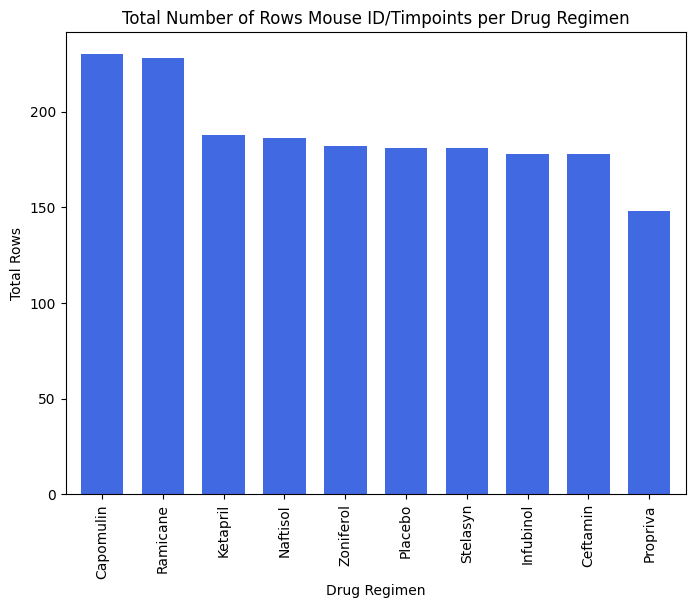

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Group by 'Drug Regimen' and count the number of rows for each group
regimen_counts = filtered_mouse_study_df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(8, 6), color='royalblue', width=0.7)

# Customize plot properties (title, labels, etc.)
plt.title('Total Number of Rows Mouse ID/Timpoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')

# Show the plot
#plt.tight_layout()
plt.show()




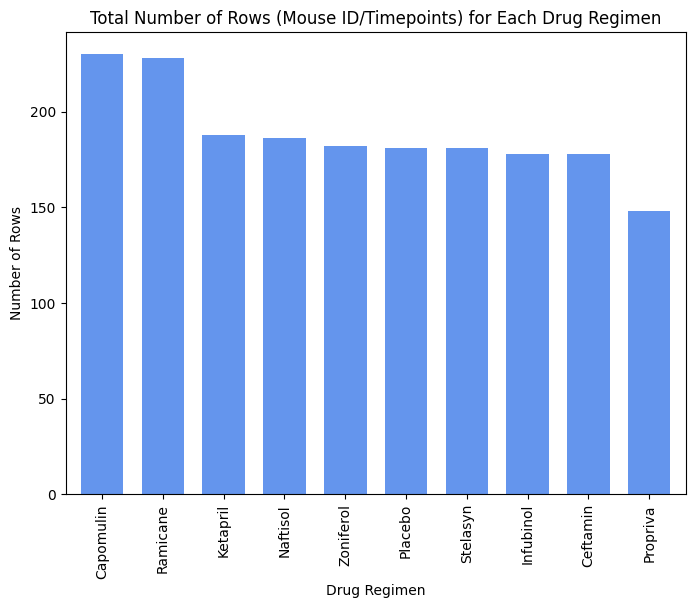

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rows_per_regimen = filtered_mouse_study_df["Drug Regimen"].value_counts()
rows_per_regimen.plot(kind="bar", color="cornflowerblue", align="center", figsize=(8, 6), width=0.7)

# Set the title and labels
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Display the plot
#plt.savefig(display_png)
plt.show()


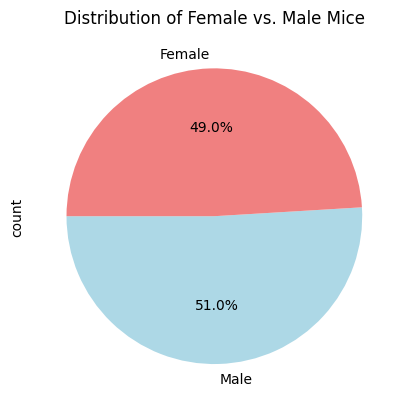

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by 'Sex' and count the number of mice in each category
gender_distribution = filtered_mouse_study_df['Sex'].value_counts()

# Create a pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=['lightblue', 'lightcoral'])

# Add a title
plt.title('Distribution of Female vs. Male Mice')

# Display the pie chart
plt.show()


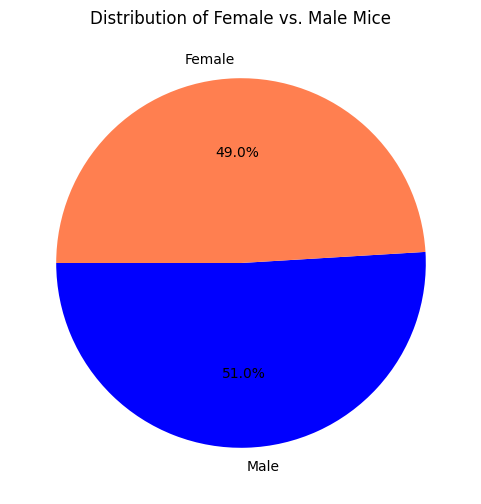

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the data by 'Sex' and count the number of mice in each category
gender_distribution = filtered_mouse_study_df['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=180, colors=['blue', 'coral'])

# Add a title
plt.title('Distribution of Female vs. Male Mice')

# Display the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Assuming you have a DataFrame called 'df' with relevant columns including 'Mouse ID', 'Timepoint', and 'Tumor Volume (mm3)'
# Also, you have a list of the four treatment regimens: ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_mouse_study_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge the last timepoint DataFrame with the original DataFrame to get the final tumor volume
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_mouse_study_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the four specific treatment regimens
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the final tumor volume DataFrame
final_tumor_volume_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [49]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


# List of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Filter the final tumor volume DataFrame for the current treatment regimen
    treatment_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    
    # Get the tumor volume data for the current regimen
    tumor_vol = treatment_df['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list for plotting
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for the current regimen
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers for the current regimen
    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print the results for the current regimen
    print(f"Regimen: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers['Tumor Volume (mm3)'].tolist()}")
    print("------------------------")



Regimen: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []
------------------------
Regimen: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []
------------------------
Regimen: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]
------------------------
Regimen: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []
------------------------


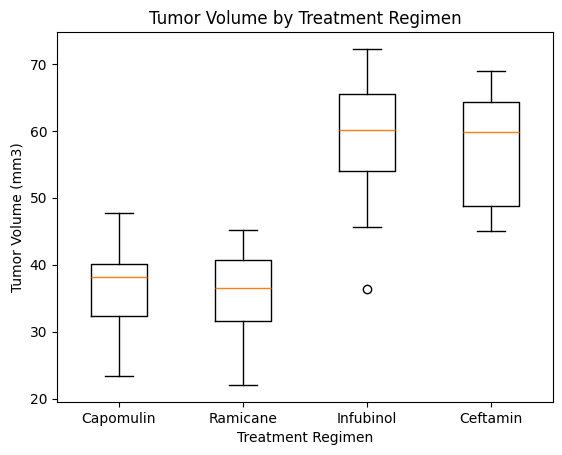

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Plot the tumor volume data for each regimen (box plots, for example)
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Tumor Volume by Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

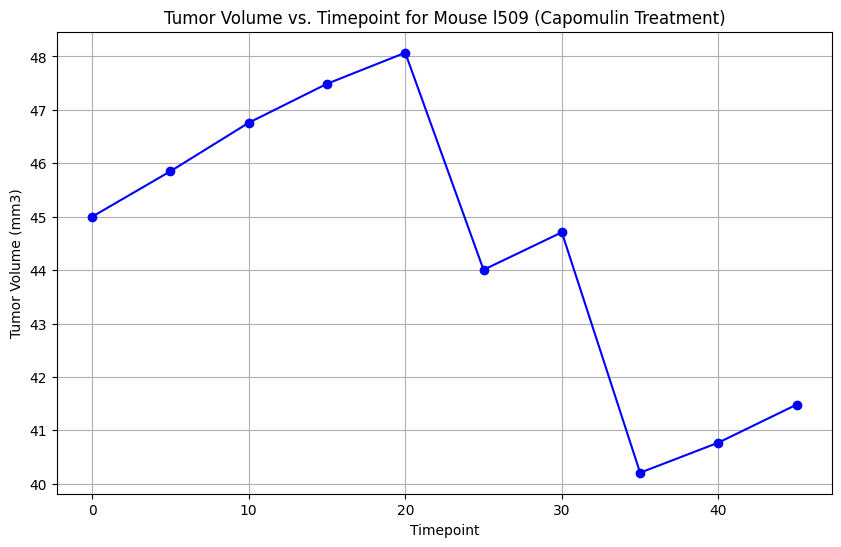

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse treated with Capomulin
mouse_id = "l509"  # Replace with the actual Mouse ID

# Filter the DataFrame for the selected mouse and Capomulin treatment
capomulin_data = filtered_mouse_study_df[(filtered_mouse_study_df["Mouse ID"] == mouse_id) & (filtered_mouse_study_df["Drug Regimen"] == "Capomulin")]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin Treatment)")

# Show the plot
plt.grid()
plt.show()


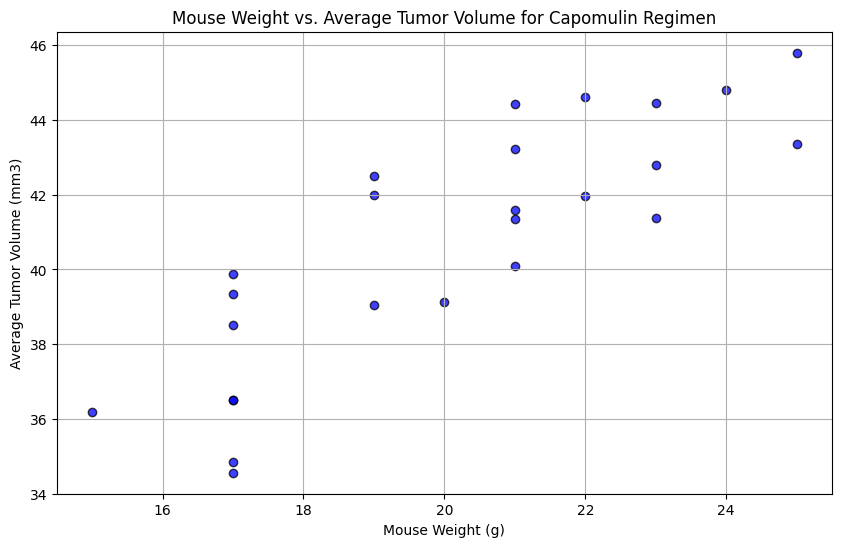

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for the Capomulin regimen
capomulin_data = filtered_mouse_study_df[filtered_mouse_study_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="blue", edgecolors="black", alpha=0.75)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Show the plot
plt.grid()
plt.show()


## Correlation and Regression

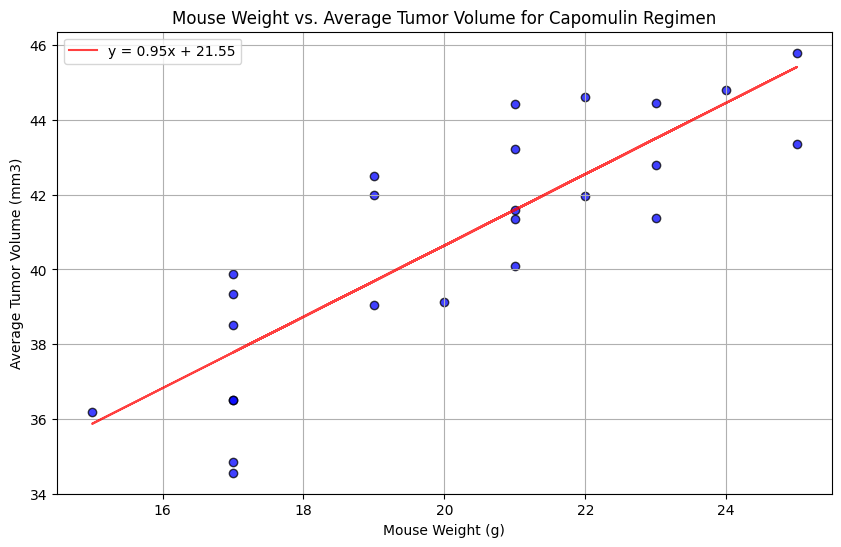

Correlation Coefficient: 0.84


In [56]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Import necessary libraries
from scipy.stats import linregress

# Filter the DataFrame for the Capomulin regimen
capomulin_data = filtered_mouse_study_df[filtered_mouse_study_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient
correlation = round(average_tumor_volume.corr(mouse_weight), 2)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)

# Calculate the regression values
regress_values = mouse_weight * slope + intercept

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="blue", edgecolors="black", alpha=0.75)

# Add the linear regression line to the plot
plt.plot(mouse_weight, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}", alpha=0.75)

# Add labels, title, and legend
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Display the correlation coefficient
print(f"Correlation Coefficient: {correlation}")
